In [9]:
# uploading dataset in collab

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" ~length {len(uploaded[fn])}bytes')

In [ ]:
# importing libraries & requirements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
# import data

df = pd.read_csv('/content/basicLinearRegression_Dataset/train.csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [15]:
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [20]:
print( df.info()) # i can see one missing data

df.dropna(inplace = True) # removing that row permanently

print( df.isna().sum()) # as the sum comes 0 means theres no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
None
x    0
y    0
dtype: int64


In [29]:
# Split our training_data further to test & train set

X_train, X_test, y_train, y_test = train_test_split(df['x'], df['y'], test_size=0.25, shuffle=True)
print(  len(X_train), len(X_test))

524 175


In [ ]:
# create model

model = LinearRegression()

In [31]:
model.fit( X_train,y_train ) 
# note: for fitting a model,you need a 2D array as feature set (X)
# now in pandas series reshaping is tricky, so we can either put xTrain to numpy array and .rehsape(-1,1)
# or

ValueError: ignored

In [39]:
# Split our training_data further to test & train set

xTrain, xTest, yTrain, yTest = train_test_split(df[['x']], df['y'], test_size=0.25, shuffle=True)
# making df[['x']] will make a 2d array
print(  len(xTrain), len(xTest)) 


# or we can go like to create a 2d array
np.array(xTest).reshape(-1,1) 

524 175


In [40]:
# create model
model2 = LinearRegression()

# fitting our data to the model
model2.fit(xTrain,yTrain)

LinearRegression()

In [44]:
# predictions

yPred = model2.predict(xTest)
# note yPred is a numpy array

In [46]:
# calculating r^2 value to calculate how many data points our model have covered our test data
r2 = r2_score(yTest, yPred)
r2 

0.9922080334604417

In [67]:
#pretty good score i belive our model overfitted
# lets calculate mean swuared error

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(yTest, yPred)
print(mse)

7.041858029496403


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


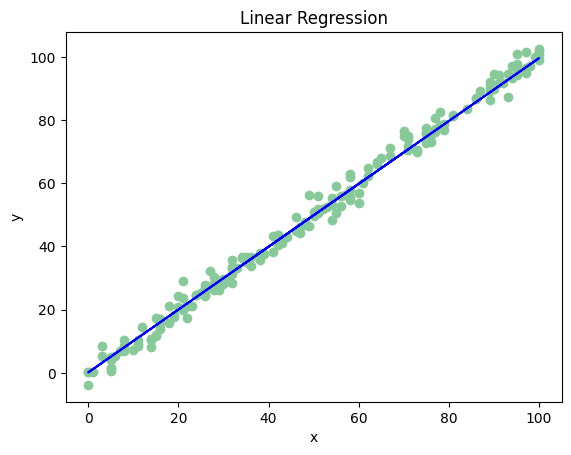

In [64]:
# lets visualize it

plt.scatter(xTest, yTest, color='#88c999')
plt.plot(xTest, model2.predict(np.array(xTest).reshape(-1,1)), color='blue') # another way of feeding directly
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

In [68]:

# lets try the r2 value with our actual test data

df1 = pd.read_csv('/content/basicLinearRegression_Dataset/test.csv')
df1.head()


,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [74]:
df1.isna().any()

x    False
y    False
dtype: bool

In [75]:
yActual_pred = model2.predict(np.array(df1['x']).reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
r2_Actual_score = r2_score(df1['y'], yActual_pred)
r2_Actual_score

0.9885529522707217

In [82]:
print(f' r2 score from train data: {r2} \n r2 score from test data:  {r2_Actual_score}')

 r2 score from train data: 0.9922080334604417 
 r2 score from test data:  0.9885529522707217


In [ ]:
# hope we got the basics covered